**Problem 1**:  A man claims to have extrasensory perception (ESP). As a test, a fair coin is flipped 10 times and the man is asked to predict the outcome in advance. He gets 7 out of 10 correct. What is the
probability that he would have done *at least* this well if he had *no ESP*?

**Hint**: If he had no ESP, what would be the probability of success, i.e. guessing an outcome? You can treat the number of correct guesses if he had no ESP as an appropriate discrete random variable $X.$

In [2]:
# Answer 1
n=10
a=7
p=1/2
pbinom(a,size=n,prob=p,lower.tail=FALSE)
#or
1-pbinom(a,n,p)

[1] 0.0546875

[1] 0.0546875

**Problem 2**: A machine produces items in batches. For each batch, the machine can be in control or out of control. Suppose the machine is in control for 99% of the production batches; The production defect rate is 0.01 when the machine is in control and 0.1 when the machine is out of control. 

Suppose we want to update our *prior* knowledge of the probability that the machine is in-/out-of control. The updated probabilites are called posterior probabilities. To that end, we select a small random sample of 5 items from a production batch and inspect how many among them are defective, which is represented by $X.$ Compute the missing entries in the following table:

![Table](https://drive.google.com/uc?id=1W6pYy1DOGEs8Z_S95TjxXAY0FeKrQrsW)

**Hint**: $$\begin{align*}P(\text{in control}\,\lvert\,X=j) &= \dfrac{P(\text{in control and X = j})}{P(X=j)}\\&=\dfrac{P(\text{in control and X = j})}{P(X=j\,\text{and in control})+P(X=j\,\text{and out of control})}\\&=\dfrac{P(\text{in control})\times P(X=j\,\lvert\,\text{in control})}{P(\text{in control})\times P\left(\underbrace{X=j\,\lvert\,\text{in control}}_{\text{Bin}(n=?,\,p=?)}\right)+P(\text{out of control})\times P\left(\underbrace{X=j\,\lvert\,\text{out of control}}_{\text{Bin}(n=?,\,p=?)}\right)}\end{align*}$$

In [4]:
# Answer 2
n = 5
a <- c(0:5)
p_ic = 0.01 # defect rate when machine is in control
p_oc = 0.1 # defect rate when machine is out of control
icp = 0.99 # prior in control probability
ocp = 0.01 # prior out of control probability
for (j in a) {
uicp = (dbinom(j,n,p_ic))/(dbinom(j,n,p_ic)+dbinom(j,n,p_oc)) # updated/posterior in control probability
uocp = (dbinom(j,n,p_oc))/(dbinom(j,n,p_ic)+dbinom(j,n,p_oc)) # updated/posterior out of control probability
print(j)
print(uicp)
print(uocp)
}

[1] 0
[1] 0.6169331
[1] 0.3830669
[1] 1
[1] 0.1277117
[1] 0.8722883
[1] 2
[1] 0.01313517
[1] 0.9868648
[1] 3
[1] 0.001208538
[1] 0.9987915
[1] 4
[1] 0.0001099879
[1] 0.99989
[1] 5
[1] 9.9999e-06
[1] 0.99999


**Problem 3**: The monthly worldwide average number of airplane crashes of commercial airlines is 3.5.
What is the probability that there will be



1.   at least 2 such accidents in the next month?
2.   at most 1 accident in the next month?



In [5]:
# Answer 3
lambda=3.5
#question1
x=2
ppois(x,lambda,lower.tail=FALSE)
#question2
x=1
ppois(x,lambda)

[1] 0.6791528

[1] 0.1358882

Let $X$ be a random variable that represents the difference between the number of heads and the number of tails obtained when a fair coin is tossed $3$ times. Assume that the tosses are independent.


1. What are the possible values of $X$? Note that this is a theoretical exercise.
2. What are the associated probabilities for the values that $X$ can take? **Hint**: for example, if $X=2,$ clearly think in plain English how this could have happened using the words *and/or*, and then compute the probability.
3. The graph below shows a frequency histogram of the values that $X$ can take from 10000 samples. You can use it to answer parts 1 and 2 for partial credit. Write a code to generate the histogram.
![Histogram](https://drive.google.com/uc?id=1CoajnCWPTIZM42EZcxsG4m-8oQQBpJf8)
4. What is the approximate probability that $P(X=\text{positive})$?
5. Calculate expected value of $X$ using theoretical probabilities and sampling frequencies. 

[1] 1
[1] 0.125 0.500 0.875 1.000
[1] 0.1242
[1] 0.1242
Mean of samples = -0.012800, mean of distribution = 0.000000 


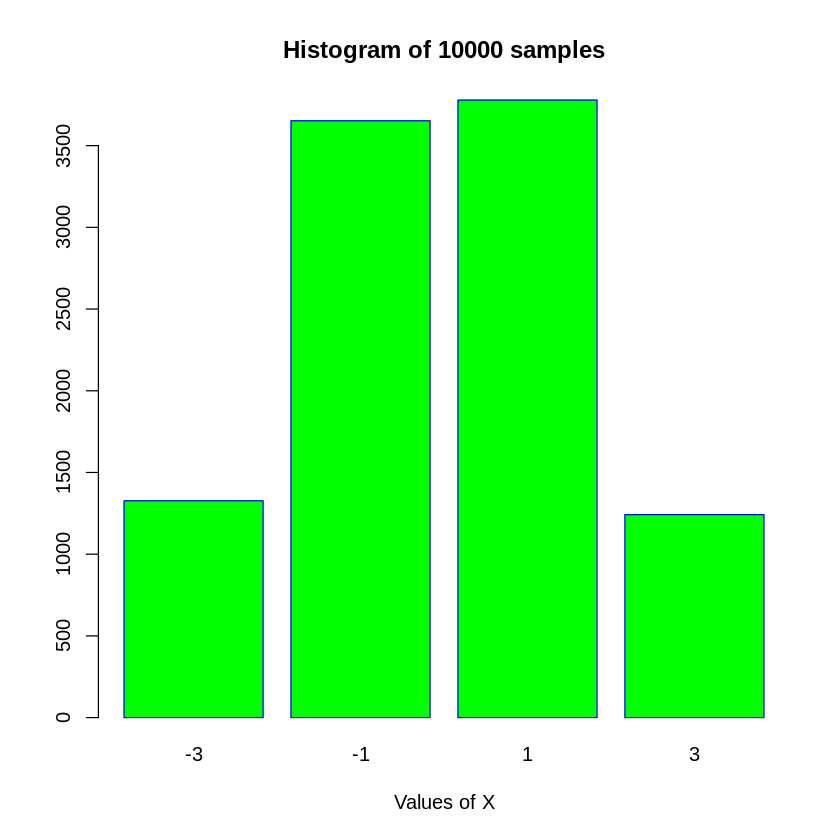

In [28]:
# Values X can take
a = c(-3,-1,1,3)

# Corresponding probabilities
p = c(1/8,3/8,3/8,1/8)
print(sum(p))

# Cumulative probabilities
cp = cumsum(p)
print(cp)

bindat = sample(a, size = 10000, replace = TRUE, prob = p)

# Create dataframe with sample values and frequencies
df = as.data.frame(table(bindat))
barplot(df$Freq, names.arg = df$bindat, ylim=c(0,max(df$Freq)+10),
xlab="Values of X", border="blue",col="green",main = "Histogram of 10000 samples")


# Calculate approximately P(X = positive)
p_positive = mean(bindat==3)
print(p_positive)
l=sum(bindat==3)
print(l/10000)
# Mean
xbar = mean(bindat) # sample mean using frequencies
mu = sum(a*p) # population mean using theoretical probabilites
cat(sprintf('Mean of samples = %f, mean of distribution = %f', xbar, mu), '\n')

**Problem 5**: Suppose a random number of $K$ customers shop at a supermarket. Let $X_1,X_2,\ldots,X_K$ represent the random number of items purchased by the 1st, 2nd,...,$K$th customer. The total number of items sold in a day is a random number $Y$ such that $$Y= X_1+X_2+\cdots+X_k.$$ Suppose $K\sim\text{Poi}(\lambda = 30)$ and $X_1,X_2,\ldots,X_K$ are all independent $\text{Poi}(\lambda = 3)$ random variables.

1. If one wants to increase the expected total number of items sold in a day, it can be achieved either by increasing the expected number of customers by 10% or the expected number of items purchased by each cutomer  by 10%. Confirm this using the code below. **Hint**: recall what is the expected value of a Poisson random variable $X\sim\text{Poi}(\lambda).$
2. Which one of the two options results in the least increase in the standard deviation of the total number of items sold in a day $Y.$

In [0]:
K = rpois(10000,30)
Y = integer(length(K)) # Create an array full of zeros
for (i in 1:length(Y))
{
  if (K[i] != 0)
  {
    for (j in 1:10)
    {
      Y[i] = Y[i] + rpois(j,3)
    }
  }
}

# Expected number of items sold in a day
#mean(?)

# Standard deviation of items sold in a day
#?(?(Y))


Warning message in Y[i] <- Y[i] + rpois(j, 3):
“number of items to replace is not a multiple of replacement length”Warning message in Y[i] <- Y[i] + rpois(j, 3):
“number of items to replace is not a multiple of replacement length”Warning message in Y[i] <- Y[i] + rpois(j, 3):
“number of items to replace is not a multiple of replacement length”Warning message in Y[i] <- Y[i] + rpois(j, 3):
“number of items to replace is not a multiple of replacement length”Warning message in Y[i] <- Y[i] + rpois(j, 3):
“number of items to replace is not a multiple of replacement length”Warning message in Y[i] <- Y[i] + rpois(j, 3):
“number of items to replace is not a multiple of replacement length”Warning message in Y[i] <- Y[i] + rpois(j, 3):
“number of items to replace is not a multiple of replacement length”Warning message in Y[i] <- Y[i] + rpois(j, 3):
“number of items to replace is not a multiple of replacement length”Warning message in Y[i] <- Y[i] + rpois(j, 3):
“number of items to replace is no

In [30]:
length(K)

[1] 10

In [16]:
K = rpois(100,30)
length(K)

[1] 100